In [78]:
import pandas as pd
import math as math
from collections import defaultdict
import scipy 
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [79]:
client_file = 'dataset/client.csv'
district_file = 'dataset/district.csv'
account_file = 'dataset/account.csv'
disp_file = 'dataset/disp.csv'
card_dev_file = 'dataset/card_dev.csv'
loan_dev_file = 'dataset/loan_dev.csv'
trans_dev_file = 'dataset/trans_dev.csv'

trans_dev_file_competition = 'dataset_competition/trans_comp.csv'
loan_dev_file_competition = 'dataset_competition/loan_comp.csv'

In [80]:
client_df = pd.read_csv(client_file, sep=";")
district_df = pd.read_csv(district_file, sep=";")
account_df = pd.read_csv(account_file, sep=";")
disp_df = pd.read_csv(disp_file, sep=";")
card_dev_df = pd.read_csv(card_dev_file, sep=";")
loan_dev_df = pd.read_csv(loan_dev_file, sep=";")
trans_dev_df = pd.read_csv(trans_dev_file, sep=";", dtype={'bank': str, 'account': str})


In [81]:
trans_dev_competition_df = pd.read_csv(trans_dev_file_competition, sep=";")
loan_dev_competition_df = pd.read_csv(loan_dev_file_competition, sep=";")

In [82]:
#months to 0:x indexes

month_index = defaultdict(int)
index = 0
for y in range(93, 98):
    for m in range(1,13):
        if(m < 10):
            month_index[str(y) + '0' + str(m)] = index
        else:
            month_index[str(y) + str(m)] = index
        index += 1

print(month_index)



defaultdict(<class 'int'>, {'9301': 0, '9302': 1, '9303': 2, '9304': 3, '9305': 4, '9306': 5, '9307': 6, '9308': 7, '9309': 8, '9310': 9, '9311': 10, '9312': 11, '9401': 12, '9402': 13, '9403': 14, '9404': 15, '9405': 16, '9406': 17, '9407': 18, '9408': 19, '9409': 20, '9410': 21, '9411': 22, '9412': 23, '9501': 24, '9502': 25, '9503': 26, '9504': 27, '9505': 28, '9506': 29, '9507': 30, '9508': 31, '9509': 32, '9510': 33, '9511': 34, '9512': 35, '9601': 36, '9602': 37, '9603': 38, '9604': 39, '9605': 40, '9606': 41, '9607': 42, '9608': 43, '9609': 44, '9610': 45, '9611': 46, '9612': 47, '9701': 48, '9702': 49, '9703': 50, '9704': 51, '9705': 52, '9706': 53, '9707': 54, '9708': 55, '9709': 56, '9710': 57, '9711': 58, '9712': 59})


In [83]:
print([trans_dev_df["account_id"][i] for i in trans_dev_df.index[:10]])

[5270, 5270, 11265, 10364, 3834, 9307, 5891, 6473, 6473, 1843]


In [84]:
#cria lista das datas de um loan fraudolento
x_default_loan = []
for i in loan_dev_df.index:
    date = str(loan_dev_df['date'][i])[0:4]
    status = str(loan_dev_df['status'][i])
    if(status == '-1'): x_default_loan.append(month_index[date])

print(x_default_loan)

[6, 8, 11, 11, 13, 16, 16, 17, 17, 18, 18, 18, 18, 20, 20, 22, 22, 23, 24, 24, 24, 25, 25, 26, 26, 26, 27, 28, 34, 34, 37, 37, 37, 37, 38, 39, 39, 39, 39, 39, 40, 43, 43, 44, 44, 47]


defaultdict(<class 'int'>, {'9301': 96, '9302': 98, '9303': 104, '9304': 77, '9305': 91, '9306': 88, '9307': 99, '9308': 102, '9309': 103, '9310': 75, '9311': 115, '9312': 91, '9401': 24, '9402': 34, '9403': 32, '9404': 41, '9405': 55, '9406': 35, '9407': 31, '9408': 37, '9409': 40, '9410': 47, '9411': 28, '9412': 35, '9501': 64, '9502': 44, '9503': 48, '9504': 52, '9505': 50, '9506': 57, '9507': 48, '9508': 58, '9509': 60, '9510': 65, '9511': 65, '9512': 50, '9601': 106, '9602': 104, '9603': 124, '9604': 101, '9605': 91, '9606': 113, '9607': 137, '9608': 133, '9609': 108, '9610': 115, '9611': 106, '9612': 125, '9701': 66, '9702': 79, '9703': 65, '9704': 82, '9705': 83, '9706': 74, '9707': 79, '9708': 83, '9709': 83, '9710': 78, '9711': 62, '9712': 64})


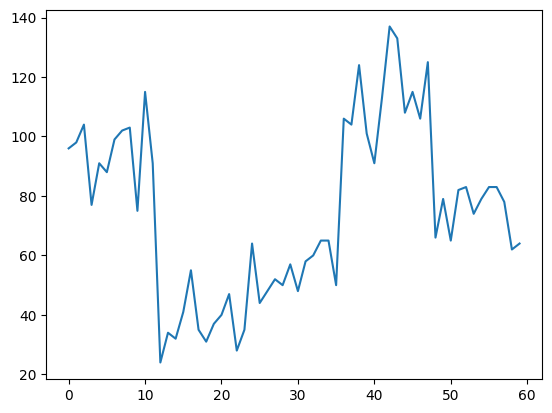

In [85]:
#cria mapa key: month value: number accounts
month_cnt = defaultdict(int)
for i in account_df.index:
    date = str(account_df['date'][i])[0:4]
    month_cnt[date] += 1

print(month_cnt) 
x = []
y = []
for k,v in month_cnt.items():
    x.append(month_index[k])
    y.append(v)


plt.plot(x,y)
plt.show()

defaultdict(<class 'int'>, {'9301': 177, '9302': 395, '9303': 676, '9304': 913, '9305': 1306, '9306': 1880, '9307': 2386, '9308': 2910, '9309': 3400, '9310': 3928, '9311': 4338, '9312': 5520, '9401': 8883, '9402': 5405, '9403': 6005, '9404': 6267, '9405': 6714, '9406': 7457, '9407': 6875, '9408': 7008, '9409': 7179, '9410': 7465, '9411': 7497, '9412': 8855, '9501': 14122, '9502': 7759, '9503': 8281, '9504': 8439, '9505': 8785, '9506': 9701, '9507': 9188, '9508': 9452, '9509': 9692, '9510': 10039, '9511': 10266, '9512': 12021, '9601': 18823, '9602': 10752, '9603': 11445, '9604': 11754, '9605': 12112, '9606': 13545, '9607': 13036, '9608': 13567, '9609': 13988, '9610': 14360, '9611': 14628, '9612': 17491})


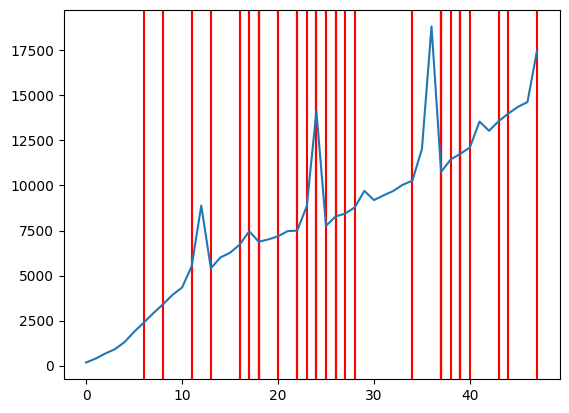

In [86]:
#cria mapa key: month value: transactions done
month_cnt = defaultdict(int)
for i in trans_dev_df.index:
    date = str(trans_dev_df['date'][i])[0:4]
    month_cnt[date] += 1

print(month_cnt) 
x = []
y = []
for k,v in month_cnt.items():
    x.append(month_index[k])
    y.append(v)

#red lines
for xc in x_default_loan:
    plt.axvline(x=xc,ymax = 140, color='red')

plt.plot(x,y)
plt.show()

In [87]:
# cria mapa do cash flow de cada mes para cada conta

mp = defaultdict(lambda: defaultdict(int))
for i in trans_dev_df.index:
    acount = trans_dev_df['account_id'][i]
    date = str(trans_dev_df['date'][i])[0:4]
    amount = 0
    if(trans_dev_df['type'][i] == "credit"): amount = trans_dev_df["amount"][i]
    elif(trans_dev_df['type'][i] == "withdrawal" ): amount = - trans_dev_df["amount"][i]
    mp[acount][date] += amount

print(mp)


defaultdict(<function <lambda> at 0x14ea1c720>, {5270: defaultdict(<class 'int'>, {'9301': 45659.2, '9302': 35417.5, '9303': -31991.7, '9304': 33130.6, '9305': -4299.200000000001, '9306': -12875.7, '9307': 40589.6, '9308': 28612.600000000002, '9309': 6194.799999999999, '9310': 9508.1, '9311': 7549.0}), 11265: defaultdict(<class 'int'>, {'9301': 1000.0, '9302': 17461.9, '9303': 6910.4, '9304': 2930.2, '9305': 1739.6, '9306': -10825.300000000001, '9307': -944.3999999999999, '9308': 51.6, '9309': 2705.0}), 10364: defaultdict(<class 'int'>, {'9301': 1100.0, '9302': 18731.3, '9303': 9793.8, '9304': 4324.4, '9305': 4743.4, '9306': -13610.5, '9307': 5541.5, '9308': -653.1, '9309': 2049.1, '9310': 2570.6, '9311': 14493.0}), 3834: defaultdict(<class 'int'>, {'9301': 700.0, '9302': 20509.7, '9303': 7274.9, '9304': 6403.9, '9305': 921.4, '9306': -22341.199999999997, '9307': 8593.9, '9308': 3256.5, '9309': -51.00000000000001, '9310': 2430.2000000000003, '9311': 3944.8, '9312': -3886.2999999999997,

In [88]:
# cria mapa do cash flow de cada mes para cada conta

mp_competition = defaultdict(lambda: defaultdict(int))
for i in trans_dev_competition_df.index:
    acount = trans_dev_competition_df['account_id'][i]
    date = str(trans_dev_competition_df['date'][i])[0:4]
    amount = 0
    if(trans_dev_competition_df['type'][i] == "credit"): amount = trans_dev_competition_df["amount"][i]
    elif(trans_dev_competition_df['type'][i] == "withdrawal" ): amount = - trans_dev_competition_df["amount"][i]
    mp_competition[acount][date] += amount

print(mp_competition)

defaultdict(<function <lambda> at 0x14ea1c7c0>, {25: defaultdict(<class 'int'>, {'9607': 900.0, '9608': 15800.0, '9609': 41436.5, '9610': 29453.5, '9611': -18381.5, '9612': 9975.1, '9701': -26333.1, '9702': 32672.100000000002, '9703': -15670.800000000001, '9704': 26796.100000000002, '9705': 39938.9, '9706': -42089.4, '9707': 14837.4, '9708': -7462.700000000001, '9709': 29414.0, '9710': 19806.600000000002, '9711': -51517.799999999996, '9712': -1110.0}), 37: defaultdict(<class 'int'>, {'9708': 56234.8, '9709': -14376.9, '9710': -6650.1, '9711': 34444.700000000004, '9712': -14167.7, '9801': -32466.399999999998, '9802': -5840.8, '9803': 56145.4, '9804': 1996.3000000000002, '9805': -18194.8, '9806': -25008.5, '9807': -5378.1, '9808': 30444.3, '9809': 22338.7, '9810': -21498.0}), 38: defaultdict(<class 'int'>, {'9708': 14989.2, '9709': 20568.7, '9710': 11325.0, '9711': 3346.2, '9712': -2698.0, '9801': -25231.5, '9802': 4564.0, '9803': 8468.1, '9804': 7981.0}), 97: defaultdict(<class 'int'>, 

No. of points in each bin :  [  0 105  89  93  98 136 129 114  85 108 112 116 102  65  78  66  73  63
  57  65  49  51  51  47  56  29  19  43  35  30  25  29  49  35  30  30
  23  85  99  65  84  88  88  76  74  66  87  86  87]
Size of the bins          :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


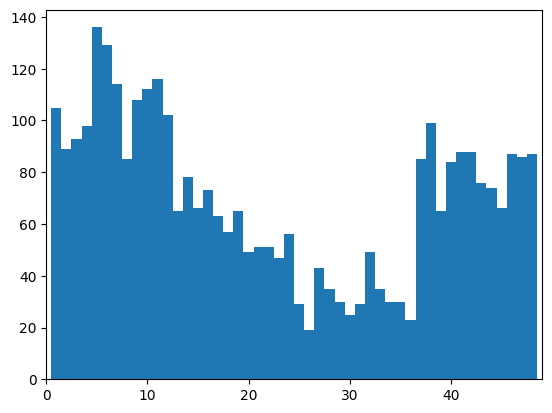

In [89]:
#histogram number of months of acounts
arr = []
for k,v in mp.items():
    arr.append(len(v))

hist, bin_edges = np.histogram(arr, bins = range(50))

print ("No. of points in each bin : ", hist) 
print ("Size of the bins          : ", bin_edges)

plt.bar(bin_edges[:-1], hist, width = 1) 
plt.xlim(min(bin_edges), max(bin_edges)) 
plt.show() 

#print(arr)

In [90]:
#cria mapa com media de cash flow ate um certo mes para cada conta

#key1: acountId key2: date in format yymm all str
cash_flow_mean = defaultdict(lambda: defaultdict(int))
#mean_until_month = defaultdict()
for k1,v1 in mp.items():
    #print("key: " + str(k1) + " V: " + str(v1))
    total = 0
    cnt = 0
    for k2,v2 in v1.items():
        #print("key1: " + str(k1) + " Key2: " + str(k2))
        total += int(v2)
        cnt += 1
        cash_flow_mean[str(k1)][str(k2)] = total / cnt


In [91]:
#cria mapa com media de cash flow ate um certo mes para cada conta

#key1: acountId key2: date in format yymm all str
cash_flow_mean_competition = defaultdict(lambda: defaultdict(int))
#mean_until_month = defaultdict()
for k1,v1 in mp_competition.items():
    #print("key: " + str(k1) + " V: " + str(v1))
    total = 0
    cnt = 0
    for k2,v2 in v1.items():
        #print("key1: " + str(k1) + " Key2: " + str(k2))
        total += int(v2)
        cnt += 1
        cash_flow_mean_competition[str(k1)][str(k2)] = total / cnt

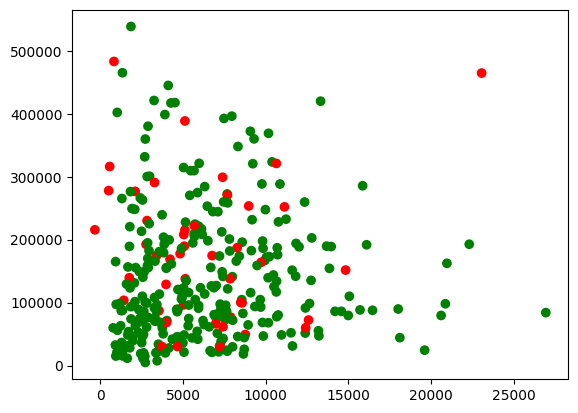

In [92]:
#scatter plot cash_flow loan amount
x = [] #cash_flow
y = [] #loan payment
c = [] #color

for i in loan_dev_df.index:
    acount = str(loan_dev_df['account_id'][i])

    date = str(loan_dev_df['date'][i])[0:4]
    if(date[2:4] == '01'):
        dt = int(date[0:2])
        dt -= 1
        date = str(dt) + '12'
    else:
        dt = int(date[2:4])
        dt -= 1
        if(dt < 10):
            date = date[0:2] + '0' + str(dt)
        else:
            date = date[0:2] + str(dt)

    cash_flow_mean_val = int(cash_flow_mean[acount][date]) 
    x.append(cash_flow_mean_val)
    #if(cash_flow_mean_val == 0):
        #print("Acount: " + acount + " " + date)
        #print(cash_flow_mean[acount])
    
    amount = int(loan_dev_df['amount'][i])
    y.append(amount)

    status = str(loan_dev_df['status'][i])
    if(status == '-1'): c.append("Red") 
    else: c.append("Green")

plt.scatter(x, y, c=c)
plt.show()


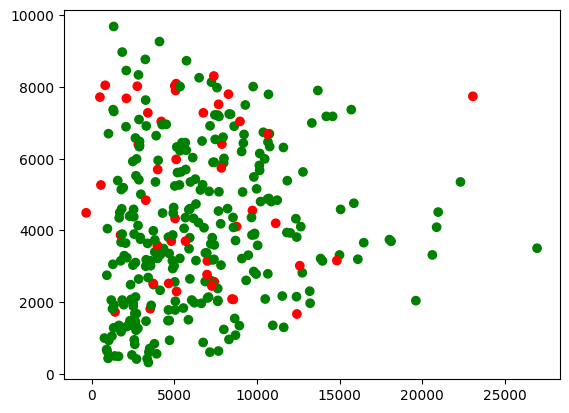

In [93]:
#scatter plot cash_flow loan payment
x = [] #cash_flow
y = [] #loan payment
c = [] #color

for i in loan_dev_df.index:
    acount = str(loan_dev_df['account_id'][i])

    date = str(loan_dev_df['date'][i])[0:4]
    if(date[2:4] == '01'):
        dt = int(date[0:2])
        dt -= 1
        date = str(dt) + '12'
    else:
        dt = int(date[2:4])
        dt -= 1
        if(dt < 10):
            date = date[0:2] + '0' + str(dt)
        else:
            date = date[0:2] + str(dt)

    cash_flow_mean_val = int(cash_flow_mean[acount][date]) 
    x.append(cash_flow_mean_val)
    #if(cash_flow_mean_val == 0):
        #print("Acount: " + acount + " " + date)
        #print(cash_flow_mean[acount])
    
    amount = int(loan_dev_df['payments'][i])
    y.append(amount)

    status = str(loan_dev_df['status'][i])
    if(status == '-1'): c.append("Red") 
    else: c.append("Green")

plt.scatter(x, y, c=c)
plt.show()


In [94]:
def month_diference(start, end):
    m1 = int(start[2:4])
    y1 = int(start[0:2])

    m2 = int(end[2:4])
    y2 = int(end[0:2])

    y_diff = abs(y1 - y2) * 12
    m_diff = 0
    if(m2 < m1):
        y_diff -= 12
        m_diff = 12 - m1 + m2
    else:
        m_diff = m2 - m1

    return y_diff + m_diff


#10/12
#5/13

No. of points in each bin :  [0 0 0 0 6 3 4 2 3 2 2 2 3 4 1 2 3 2 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
Size of the bins          :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


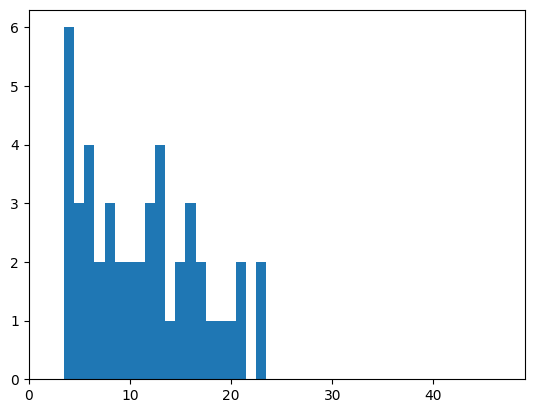

[4, 5, 9, 6, 5, 6, 16, 7, 15, 11, 8, 14, 13, 4, 11, 15, 12, 16, 17, 10, 16, 23, 9, 19, 20, 21, 6, 17, 8, 4, 18, 6, 4, 13, 4, 10, 23, 8, 12, 12, 5, 21, 7, 4, 13, 13]


In [95]:
#graphic age of acounts that have bad loans
bad_loans = []
for i in loan_dev_df.index:
    status = int(loan_dev_df['status'][i])
    if(status == -1):
        bad_loans.append((str(loan_dev_df['account_id'][i]), str(loan_dev_df['date'][i])))

account_dates = defaultdict(int)
for i in account_df.index:
    account_dates[str(account_df["account_id"][i])] = str(account_df['date'][i])

bad_loans_date = []

for (id, date) in bad_loans:
    date_diff = month_diference(account_dates[id], date)
    bad_loans_date.append(date_diff)

hist, bin_edges = np.histogram(bad_loans_date, bins = range(50))

print ("No. of points in each bin : ", hist) 
print ("Size of the bins          : ", bin_edges)

plt.bar(bin_edges[:-1], hist, width = 1) 
plt.xlim(min(bin_edges), max(bin_edges)) 
plt.show() 

print(bad_loans_date)

In [96]:
#map of amount of money in acount in every month
acount_money = defaultdict(lambda: defaultdict(int))
for i in trans_dev_df.index:
    acount = str(trans_dev_df['account_id'][i])
    balance = int(trans_dev_df['balance'][i])
    date = str(trans_dev_df['date'][i])[0:4]
    acount_money[acount][date] = balance

print(acount_money)

defaultdict(<function <lambda> at 0x14cb90b80>, {'5270': defaultdict(<class 'int'>, {'9301': 45659, '9302': 81076, '9303': 49085, '9304': 82215, '9305': 77916, '9306': 55013, '9307': 51881, '9308': 80493, '9309': 86688, '9310': 96196, '9311': 103745}), '11265': defaultdict(<class 'int'>, {'9301': 1000, '9302': 18461, '9303': 25372, '9304': 28302, '9305': 30042, '9306': 19231, '9307': 18287, '9308': 18338, '9309': 21029}), '10364': defaultdict(<class 'int'>, {'9301': 1100, '9302': 19831, '9303': 29625, '9304': 33949, '9305': 38692, '9306': 25082, '9307': 30623, '9308': 29970, '9309': 32019, '9310': 34590, '9311': 49083}), '3834': defaultdict(<class 'int'>, {'9301': 700, '9302': 21209, '9303': 28484, '9304': 34888, '9305': 35809, '9306': 13468, '9307': 22062, '9308': 25319, '9309': 25268, '9310': 27698, '9311': 31643, '9312': 27756, '9401': 14039, '9402': 21532, '9403': 16966, '9404': 24171, '9405': 20242, '9406': 18386, '9407': 23295, '9408': 27016, '9409': 28531}), '9307': defaultdict(

In [97]:
#map of amount of money in acount in every month (competicion)
acount_money_competicion = defaultdict(lambda: defaultdict(int))
for i in trans_dev_competition_df.index:
    acount = str(trans_dev_competition_df['account_id'][i])
    balance = int(trans_dev_competition_df['balance'][i])
    date = str(trans_dev_competition_df['date'][i])[0:4]
    acount_money_competicion[acount][date] = balance

print(acount_money_competicion)

defaultdict(<function <lambda> at 0x14e35fce0>, {'25': defaultdict(<class 'int'>, {'9607': 900, '9608': 16700, '9609': 58136, '9610': 87604, '9611': 69223, '9612': 63168, '9701': 29367, '9702': 39113, '9703': 26342, '9704': 37097, '9705': 77036, '9706': 34946, '9707': 49784, '9708': 42321, '9709': 71735, '9710': 91542, '9711': 40024, '9712': 31621}), '37': defaultdict(<class 'int'>, {'9708': 56234, '9709': 41857, '9710': 35207, '9711': 69667, '9712': 55499, '9801': 23032, '9802': 17192, '9803': 61986, '9804': 57682, '9805': 39488, '9806': 14479, '9807': 9101, '9808': 15542, '9809': 37880, '9810': 16367}), '38': defaultdict(<class 'int'>, {'9708': 14989, '9709': 35557, '9710': 46882, '9711': 50229, '9712': 47561, '9801': 22329, '9802': 26893, '9803': 29465, '9804': 37416}), '97': defaultdict(<class 'int'>, {'9605': 18873, '9606': 50418, '9607': 54766, '9608': 60334, '9609': 57495, '9610': 47039, '9611': 41071, '9612': 31785, '9701': 19777, '9702': 15076, '9703': 27821, '9704': 25777, '9

In [98]:
#map of district id (avg_Salary, crime 95/96, unempleyment 95/96)

def mean_rate(unemployment_95, unemployment_96):
    if (unemployment_95 == '?' and unemployment_96 == '?'):
        return "Unknown"
    elif (unemployment_95 == '?'):
        return float(unemployment_96)
    elif (unemployment_96 == '?'):
        return float(unemployment_95)
    else: return (float(unemployment_95) + float(unemployment_96)) / 2

district_map = defaultdict(lambda: (int, int, int))
for i in district_df.index:
    code = str(district_df['code '][i])
    habitants = int(district_df['no. of inhabitants'][i])
    unemployment_95 = district_df["unemploymant rate '95 "][i]
    unemployment_96 = district_df["unemploymant rate '96 "][i]
    crime_95 = district_df["no. of commited crimes '95 "][i]
    crime_96 = district_df["no. of commited crimes '96 "][i]
    avg_sal = int(district_df["average salary "][i])

    unemployment = mean_rate(unemployment_95, unemployment_96)
    crime_rate = mean_rate(crime_95, crime_96) / habitants

    district_map[code] = (avg_sal, crime_rate, unemployment)

print(district_map)


defaultdict(<function <lambda> at 0x14cb90c20>, {'1': (12541, 0.07667684963645885, 0.36), '2': (8507, 0.02718712029161604, 1.76), '3': (8980, 0.03746411101658868, 2.08), '4': (9753, 0.03714649783512239, 4.845), '5': (9307, 0.029576639892904953, 4.14), '6': (8546, 0.036940600028218515, 3.485), '7': (9920, 0.048218527315914486, 2.565), '8': (11277, 0.045357604961406325, 1.345), '9': (8899, 0.03364722659323367, 3.68), '10': (10124, 0.04412275748229877, 0.55), '11': (9622, 0.04630009122519402, 0.52), '12': (8754, 0.035561323815704086, 4.07), '13': (8598, 0.03219524860443983, 3.0149999999999997), '14': (10045, 0.03629717591706719, 1.565), '15': (9045, 0.03166882100823185, 3.365), '16': (8427, 0.020158414155071275, 1.33), '17': (8114, 0.014744403337744053, 2.5), '18': (8968, 0.025813660730703406, 3.09), '19': (8402, 0.020397448860542896, 3.5549999999999997), '20': (8547, 0.021975766497749342, 3.145), '21': (9104, 0.022511538796481757, 1.79), '22': (8620, 0.018886986301369865, 1.175), '23': (

In [99]:
#map acount_id district_id

account_district_map = defaultdict(int)
for i in account_df.index:
    acount = str(account_df['account_id'][i])
    district = str(account_df['district_id'][i])
    account_district_map[acount] = district

In [100]:
#map acount_id good loans
account_good_loan = defaultdict(int)
for i in loan_dev_df.index:
    account = str(loan_dev_df['account_id'][i])
    status = int(loan_dev_df['status'][i])
    if(status == 1): account_good_loan[account] += 1

print(account_good_loan)

defaultdict(<class 'int'>, {'1801': 1, '9188': 1, '1843': 1, '11013': 1, '8261': 1, '11265': 1, '10973': 1, '4894': 1, '10364': 1, '5270': 1, '6701': 1, '2705': 1, '7123': 1, '10320': 1, '9034': 1, '9236': 1, '2': 1, '7401': 1, '2486': 1, '1071': 1, '8475': 1, '11111': 1, '1603': 1, '1166': 1, '10940': 1, '5313': 1, '11135': 1, '2694': 1, '7753': 1, '7445': 1, '7485': 1, '8330': 1, '6555': 1, '10079': 1, '5385': 1, '5891': 1, '8321': 1, '5256': 1, '813': 1, '2933': 1, '8173': 1, '9833': 1, '7769': 1, '7454': 1, '6930': 1, '173': 1, '8051': 1, '10439': 1, '9337': 1, '4576': 1, '8027': 1, '6273': 1, '11065': 1, '8558': 1, '1811': 1, '7844': 1, '4260': 1, '3354': 1, '2762': 1, '9265': 1, '5228': 1, '2824': 1, '4937': 1, '10911': 1, '8129': 1, '9093': 1, '5215': 1, '9403': 1, '9104': 1, '5120': 1, '8519': 1, '10788': 1, '8260': 1, '4259': 1, '10105': 1, '3050': 1, '3674': 1, '5481': 1, '9307': 1, '4427': 1, '3834': 1, '7965': 1, '5952': 1, '6040': 1, '4448': 1, '8982': 1, '6363': 1, '1012'

In [101]:
#build training table

#loan_id loan_amount payments status 
#account_cash account_cash_flow account_date card_type(missing) n_good_loans
#avg_salary crime 95/96 unemployment 95/96
#owner_age(missing) owner_gender(missing)

final_loan_df = pd.DataFrame({'loan_amount' : [],
                              'loan_payment' : [],
                              'account_cash' : [], 
                              'account_cash_flow' : [],
                              'account_age' : [],
                              'good_loans' : [],
                              'avg_salary' : [],
                              'crime_rate' : [],
                              'unemployment_rate' : [],
                              'status' : []})
for i in loan_dev_df.index:
    account = str(loan_dev_df['account_id'][i])

    date = str(loan_dev_df['date'][i])[0:4]
    if(date[2:4] == '01'):
        dt = int(date[0:2])
        dt -= 1
        date = str(dt) + '12'
    else:
        dt = int(date[2:4])
        dt -= 1
        if(dt < 10):
            date = date[0:2] + '0' + str(dt)
        else:
            date = date[0:2] + str(dt)

    district = account_district_map[account]
    (avg_sal, crime, unemployment) = district_map[district]
    account_cash = acount_money[account][date]
    account_cash_flow = cash_flow_mean[account][date]
    good_loans_cnt = account_good_loan[account]
    
    account_date = account_dates[account]
    loan_date = str(loan_dev_df['date'][i])[0:4]
    loan_age = month_diference(account_date, loan_date)

    loan_amount = int(loan_dev_df['amount'][i])
    loan_payment = int(loan_dev_df['payments'][i])
    status = int(loan_dev_df['status'][i])

    final_loan_df.loc[i] = [loan_amount, loan_payment, account_cash, account_cash_flow, loan_age, good_loans_cnt, avg_sal, crime, unemployment, status]

print(final_loan_df)

     loan_amount  loan_payment  account_cash  account_cash_flow  account_age  \
0        96396.0        8033.0       20100.0        5025.000000          4.0   
1       165960.0        4610.0       27412.0        8218.600000          5.0   
2       127080.0        2118.0       34930.0        7006.800000          5.0   
3       105804.0        2939.0       34292.0        4898.714286          7.0   
4       274740.0        4579.0       41142.0        5873.285714          7.0   
..           ...           ...           ...                ...          ...   
323     155616.0        3242.0       48920.0        2126.130435         23.0   
324     222180.0        3703.0       60972.0        5676.769231         13.0   
325      45024.0         938.0       32997.0        4711.857143          7.0   
326     115812.0        3217.0       74292.0        9087.157895         19.0   
327     129408.0        5392.0       22057.0        1574.428571         14.0   

     good_loans  avg_salary  crime_rate

In [109]:
#build training table

#loan_id loan_amount payments status 
#account_cash account_cash_flow account_date card_type(missing) n_good_loans
#avg_salary crime 95/96 unemployment 95/96
#owner_age(missing) owner_gender(missing)

final_loan_competition_df = pd.DataFrame({'loan_amount' : [],
                              'loan_payment' : [],
                              'account_cash' : [], 
                              'account_cash_flow' : [],
                              'account_age' : [],
                              'good_loans' : [],
                              'avg_salary' : [],
                              'crime_rate' : [],
                              'unemployment_rate' : []})
for i in loan_dev_competition_df.index:
    account = str(loan_dev_competition_df['account_id'][i])

    date = str(loan_dev_competition_df['date'][i])[0:4]
    if(date[2:4] == '01'):
        dt = int(date[0:2])
        dt -= 1
        date = str(dt) + '12'
    else:
        dt = int(date[2:4])
        dt -= 1
        if(dt < 10):
            date = date[0:2] + '0' + str(dt)
        else:
            date = date[0:2] + str(dt)

    district = account_district_map[account]
    (avg_sal, crime, unemployment) = district_map[district]
    account_cash = acount_money_competicion[account][date]
    account_cash_flow = cash_flow_mean_competition[account][date]
    good_loans_cnt = account_good_loan[account]
    
    account_date = account_dates[account]
    loan_date = str(loan_dev_competition_df['date'][i])[0:4]
    loan_age = month_diference(account_date, loan_date)

    loan_amount = int(loan_dev_competition_df['amount'][i])
    loan_payment = int(loan_dev_competition_df['payments'][i])

    final_loan_competition_df.loc[i] = [loan_amount, loan_payment, account_cash, account_cash_flow, loan_age, good_loans_cnt, avg_sal, crime, unemployment]

print(final_loan_competition_df)

     loan_amount  loan_payment  account_cash  account_cash_flow  account_age  \
0        93960.0        1566.0       69248.0        4616.466667         15.0   
1       260640.0        7240.0        -713.0         383.562500         16.0   
2       232560.0        4845.0       64446.0        6328.190476         21.0   
3       221880.0        3698.0       35483.0        9407.700000         10.0   
4        38520.0        3210.0       20996.0        1105.000000         19.0   
..           ...           ...           ...                ...          ...   
349     352704.0        7348.0       23789.0        1634.882353         17.0   
350      52512.0        4376.0       41050.0        6667.352941         17.0   
351     139488.0        5812.0       73456.0        8283.736842         19.0   
352      55632.0        2318.0       38463.0        5574.523810         21.0   
353     240900.0        4015.0       28641.0        1596.222222         18.0   

     good_loans  avg_salary  crime_rate

[[-0.46544991  1.77241121 -0.96122138 ...  0.04175015 -0.35765816
   0.16474263]
 [ 0.19651742  0.2095934  -0.60631475 ... -0.90213337 -0.6880669
  -0.54306329]
 [-0.1734626  -0.92816354 -0.24140939 ... -0.88665987 -0.54596491
  -0.28633368]
 ...
 [-0.95430313 -1.46690879 -0.33523249 ...  0.43006132 -0.12061223
   1.92346039]
 [-0.28068829 -0.42639994  1.66912599 ... -0.85939703 -0.90554984
  -0.88856855]
 [-0.15130947  0.56662627 -0.86623338 ... -1.0929732  -0.39562074
   1.42919591]]


Text(0, 0.5, 'Accuracy Score')

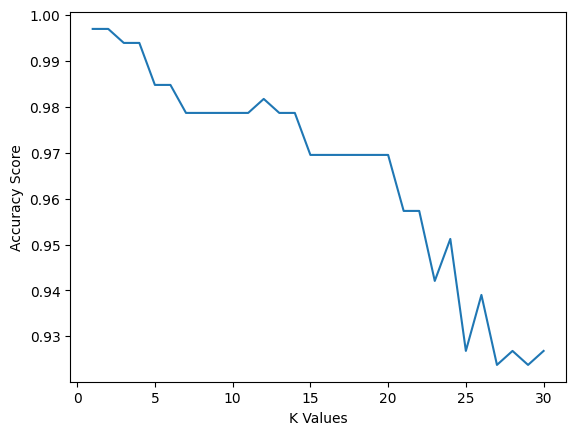

In [ ]:
#train model knn
X = final_loan_df.drop('status', axis=1)
Y = final_loan_df['status']

k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)
#Y = scaler.fit_transform(Y)

print(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, Y, cv=2)
    scores.append(np.mean(score))

plt.plot(k_values, scores)
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")




In [112]:
#naive bays model
#train model knn
X = final_loan_df.drop('status', axis=1)
X = X.drop('good_loans', axis=1)
Y = final_loan_df['status']

scaler = StandardScaler()
X = scaler.fit_transform(X)

print(Y)
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

predicted = model.predict_proba(X_test)
#accuracy = accuracy_score(y_test, predicted, normalize=True)
print(predicted)
#print(y_test)
#print("Accuracy:", accuracy)
print(len(y_test))

X_competition = final_loan_competition_df.drop('good_loans', axis=1)
X_competition = scaler.fit_transform(X_competition)
predicted = model.predict_proba(X_competition)
print(predicted)


0     -1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
323    1.0
324   -1.0
325    1.0
326    1.0
327    1.0
Name: status, Length: 328, dtype: float64
[[0.0700467  0.9299533 ]
 [0.12818229 0.87181771]
 [0.54921502 0.45078498]
 [0.42738861 0.57261139]
 [0.06751399 0.93248601]
 [0.31452548 0.68547452]
 [0.04447332 0.95552668]
 [0.35382899 0.64617101]
 [0.1676221  0.8323779 ]
 [0.02318295 0.97681705]
 [0.12283156 0.87716844]
 [0.05774398 0.94225602]
 [0.01703106 0.98296894]
 [0.11680582 0.88319418]
 [0.10993093 0.89006907]
 [0.04256817 0.95743183]
 [0.06484442 0.93515558]
 [0.09282372 0.90717628]
 [0.02588272 0.97411728]
 [0.07243072 0.92756928]
 [0.16260962 0.83739038]
 [0.05891497 0.94108503]
 [0.0923948  0.9076052 ]
 [0.02311555 0.97688445]
 [0.20898211 0.79101789]
 [0.20921545 0.79078455]
 [0.11853999 0.88146001]
 [0.07930039 0.92069961]
 [0.20578297 0.79421703]
 [0.03944649 0.96055351]
 [0.07960287 0.92039713]
 [0.06849584 0.93150416]
 [0.06241818 0.93758182]
 [0.21868497

In [111]:
#SVC

X = final_loan_df.drop('status', axis=1)
X = X.drop('good_loans', axis=1)
Y = final_loan_df['status']

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model = SVC(probability=True)
model.fit(X_train, y_train)

predicted = model.predict_proba(X_test)
#print(predicted)

X_competition = final_loan_competition_df.drop('good_loans', axis=1)
X_competition = scaler.fit_transform(X_competition)
predicted = model.predict_proba(X_competition)
print(predicted)

[[0.15098104 0.84901896]
 [0.3423879  0.6576121 ]
 [0.09210799 0.90789201]
 [0.10981897 0.89018103]
 [0.11891924 0.88108076]
 [0.07331127 0.92668873]
 [0.12215675 0.87784325]
 [0.1030965  0.8969035 ]
 [0.12214012 0.87785988]
 [0.08859871 0.91140129]
 [0.15352694 0.84647306]
 [0.17535826 0.82464174]
 [0.45293382 0.54706618]
 [0.29404772 0.70595228]
 [0.29796956 0.70203044]
 [0.65356719 0.34643281]
 [0.07609769 0.92390231]
 [0.1534187  0.8465813 ]
 [0.17319944 0.82680056]
 [0.0848486  0.9151514 ]
 [0.20602778 0.79397222]
 [0.14331789 0.85668211]
 [0.10296524 0.89703476]
 [0.14099887 0.85900113]
 [0.12733114 0.87266886]
 [0.07479158 0.92520842]
 [0.10846662 0.89153338]
 [0.15953462 0.84046538]
 [0.18443028 0.81556972]
 [0.16244491 0.83755509]
 [0.142127   0.857873  ]
 [0.07095292 0.92904708]
 [0.13605467 0.86394533]
 [0.06360726 0.93639274]
 [0.14070777 0.85929223]
 [0.10248354 0.89751646]
 [0.2360906  0.7639094 ]
 [0.13752439 0.86247561]
 [0.15583354 0.84416646]
 [0.21490991 0.78509009]
